**<h1>Deep Learning for Anti-Money Laundering</h1>**

---


---





**<h2>Introduction</h2>**


---



Money laundering is the illegal process of making large amounts of money or we can say the “dirty” money generated by criminal activity, such as drug trafficking or terrorist funding, appears to have come from a legitimate source. The money from criminal activity is considered dirty, and the process "launders" it to make it look clean. Money laundering is a serious financial crime that is employed by white-collar and street-level criminals alike. Most financial companies have anti-money-laundering (AML) policies in place to detect and prevent this activity.
There are many ways to launder money, from the simple to the very complex. One of the most common techniques is to use a legitimate, cash-based business owned by a criminal organization. For example, if the organization owns a restaurant, it might inflate the daily cash receipts to funnel illegal cash through the restaurant and into the restaurant's bank account. After that, the funds can be withdrawn as needed. These types of businesses are often referred to as "fronts."
Governments around the world have stepped up their efforts to combat money laundering in recent decades, with regulations that require financial institutions to put systems in place to detect and report suspicious activity. The amount of money involved is substantial: According to a 2018 survey from PwC, global money laundering transactions account for roughly 1 dollar trillion to 2$ trillion annually or some 2% to 5% of global GDP.
Deep learning is an artificial intelligence function that imitates the workings of the human brain in processing data and creating patterns for use in decision making. Deep learning is a subset of machine learning in artificial intelligence (AI) that has networks capable of learning unsupervised from data that is unstructured or unlabeled. Also known as deep neural learning or deep neural network.





**<h2>Motivation</h2>**

---



A traditional approach to detecting money laundering might rely on the amount of transaction that ensues, while a deep learning nonlinear technique would include time, geographic location, IP address, type of retailer, and any other feature that is likely to point to fraudulent activity. Money laundering (ML) is a serious crime which makes it necessary to develop detection methods in transactions. Some researches have been carried on, but the problem is not thoroughly solved.
With neural networks, we aim to combat the serious crime of money laundering with the help of the layered approach of neural networks. The first layer of the neural network processes a raw data input like the amount of the transaction and passes it on to the next layer as output. The second layer processes the previous layer’s information by including additional information like the user's IP address and passes on its result.
The next layer takes the second layer’s information and includes raw data like geographic location and makes the machine’s pattern even better. This continues across all levels of the neuron network.
We aim to use these benefits of neural network and implement a Deep Recurrent Neural Network. We will also perform a comparative analysis with the main neural networks ANN and RNN to find which models perform better.

**<h2>Data</h2>**

---



**SOURCE** : https://www.kaggle.com/ntnu-testimon/paysim1

This is a synthetic dataset generated using the simulator called PaySim as an approach to such a problem. PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour.PaySim simulates mobile money transactions based on a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country. The original logs were provided by a multinational company, who is the provider of the mobile financial service which is currently running in more than 14 countries all around the world.

**<h3>Headers</h3>**

This is a sample of 1 row with headers explanation:

1 , PAYMENT , 1060.31 , C429214117 , 1089.0 , 28.69 , M1591654462 , 0.0 , 0.0 , 0 , 0

>step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

>type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

>amount -
amount of the transaction in local currency.

>nameOrig - customer who started the transaction

>oldbalanceOrg - initial balance before the transaction

>newbalanceOrig - new balance after the transaction

>nameDest - customer who is the recipient of the transaction

>oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

>newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

>isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

>isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.



In [1]:
#installing all libraries
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from seaborn import heatmap
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score,roc_curve,auc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers.normalization import BatchNormalization

from google.colab import drive

Using TensorFlow backend.


**<h2>LOAD DATA</h2>**

In [2]:
drive.mount('/content/driver/')

Drive already mounted at /content/driver/; to attempt to forcibly remount, call drive.mount("/content/driver/", force_remount=True).


In [3]:
df = pd.read_csv("/content/driver/My Drive/Anti_laundering/PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


**<h2>EDA</h2>**

In [ ]:
print("Total number of data point :" ,df.shape[0])
print("Total number of columns :" ,df.shape[1])
print("Number of negative data poins(genuine) :",df[df["isFraud"] == 0].shape[0])
print("Number of positive data poins(fraud) :",df[df["isFraud"] == 1].shape[0])

Total number of data point : 6362620
Total number of columns : 11
Number of negative data poins(genuine) : 6354407
Number of positive data poins(fraud) : 8213


Number of unique values in type column : 5
Unique values in type column : ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


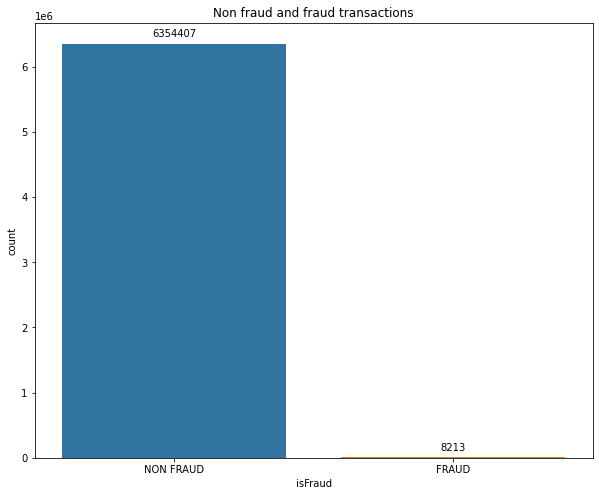

In [ ]:
print("Number of unique values in type column :",len(df["type"].unique()))
print("Unique values in type column :",df["type"].unique())
print('='*90)

#plotting barplot of Non fraud and fraud transactions
plt.figure(figsize=(10, 8))
plt.title("Non fraud and fraud transactions")
splot = sns.countplot(x='isFraud', data=df)  #https://seaborn.pydata.org/generated/seaborn.countplot.html
#adding annotation
for p in splot.patches:
  splot.annotate(format(p.get_height(), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
positions = (0, 1)
labels = ("NON FRAUD", "FRAUD")
plt.xticks(positions, labels)
plt.show()

Number of unique values in type column : 5
Unique values in type column : ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


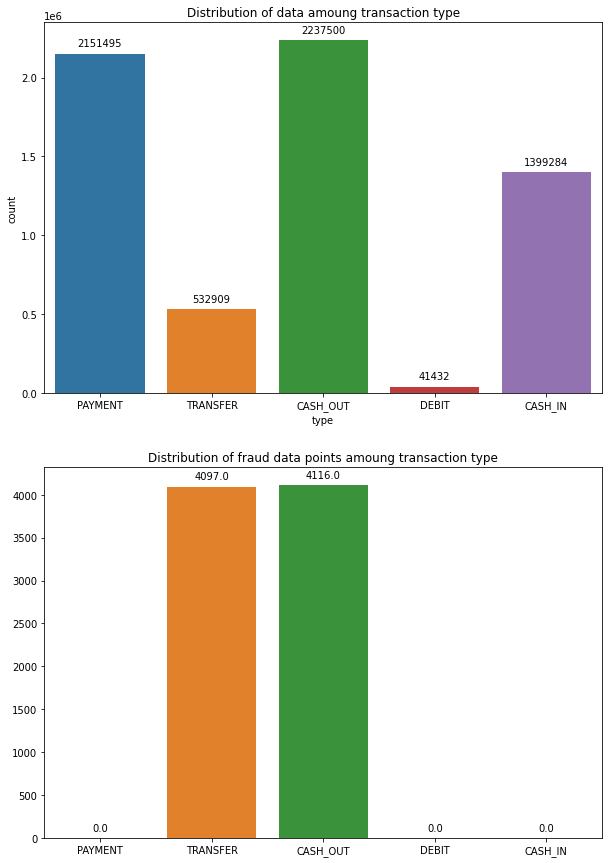

In [ ]:
print("Number of unique values in type column :",len(df["type"].unique()))
print("Unique values in type column :",df["type"].unique())
print('='*90)


plt.figure(figsize=(10, 15))

#plotting Distribution of data points amoung transaction type

plt.subplot(2,1,1)

plt.title("Distribution of data amoung transaction type")
splot = sns.countplot(x='type', data=df)  #https://seaborn.pydata.org/generated/seaborn.countplot.html
#adding annotation
for p in splot.patches:
  splot.annotate(format(p.get_height(), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#Distribution of fraud data points amoung transaction type

plt.subplot(2,1,2)

##########
count_fraud = []
for c in df.type.unique():    #Counting fraud points in each class of type
    if c in df[df["isFraud"]==1]['type'].unique():
        count_fraud.append(df[df["isFraud"]==1].groupby("type")['isFraud'].count()[c])
    else:
        count_fraud.append(0)
############

x = df.type.unique()
y =count_fraud
plt.title("Distribution of fraud data points amoung transaction type")
splot2 = sns.barplot(x,y)   #https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot
#adding annotation
for p in splot2.patches:
  splot2.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

In [ ]:
print("minimum amount of fraud transactions =",df[df.isFraud == 1].amount.min())
print("maximum amount of fraud transactions =",df[df.isFraud == 1].amount.max())
print("minimum amount of genuine transactions =",df[df.isFraud == 0].amount.min())
print("maximum amount of genuine transactions =",df[df.isFraud == 0].amount.max())

minimum amount of fraud transactions = 0.0
maximum amount of fraud transactions = 10000000.0
minimum amount of genuine transactions = 0.01
maximum amount of genuine transactions = 92445516.64


In [ ]:
print("Count of unique value of nameOrig :",len(df.nameOrig.unique()))
print("Count of unique value of nameDest :",len(df.nameDest.unique()))

Count of unique value of nameOrig : 6353307
Count of unique value of nameDest : 2722362


In [ ]:
print("Number of time a fraud transaction flagged fraud  :",df[((df["isFraud"]==1) & (df["isFlaggedFraud"]==1))].shape[0])
print("Number of time a non fraud transaction flagged fraud  :",df[((df["isFraud"]==0) & (df["isFlaggedFraud"]==1))].shape[0])

Number of time a fraud transaction flagged fraud  : 16
Number of time a non fraud transaction flagged fraud  : 0


**<h3>DATA PREPROCESSING</h3>**

In [4]:
x = df.iloc[:,df.columns != 'isFraud'].values
Y = df.iloc[:, -2].values

In [6]:
X = x[10:]
y = Y[10:]

In [7]:
label_encoder_x = LabelEncoder() #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
o_h_enc = OneHotEncoder()        #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder
o_h_enc.fit(x[:,1].reshape(-1,1))

label_encoder_x.fit(x[:,3])
X[:, 3] = label_encoder_x.transform(X[:,3])
label_encoder_x.fit(x[:,6])
X[:, 6] = label_encoder_x.transform(X[:,6])

In [8]:
X[:,0].reshape(-1,1)
X = np.concatenate((X[:,0].reshape(-1,1),o_h_enc.transform(X[:,1].reshape(-1,1)).toarray(), X[:,2:]), axis=1)  #cocatenate all processed features


In [9]:
#data is imbalanced so oversampling using smote
#https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
print("data points befor SMOTE :",X.shape[0])
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X,y)
print("data points after SMOTE :",X_resampled.shape[0])

data points befor SMOTE : 6362610
data points after SMOTE : 12708798


**<h3>MODELING</h3>**

In [11]:
st_sc = StandardScaler()
X_resampled = st_sc.fit_transform(X_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size = 0.2)

In [26]:
#Some important functions
def plot_con_mat(model):
    pred = model.predict_classes(X_test)
    f1s = f1_score(Y, pred)
    print('\nf1 score is %.4f' % ( f1s))
    A = np.asarray([['TN','FN'],['FP','TP']])
    CM = confusion_matrix(y_test, pred)       #sklearn Confusion matrix
    print(CM)
    heatmap(CM,cmap="Blues",linewidths=.5,annot = A,fmt ='s')
    plt.show()



def plot_auc_roc(model):
    plt.figure()
    lw = 2

    #ROC_AUC curve
    # plot for test

    pred = model.predict_classes(X_test)
    fpr, tpr, thresholds = roc_curve(pred, y_test)
    roc_auc = auc(fpr,tpr)
    print("Test AUC Score = ",roc_auc)
    plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

    #plot for train

    pred = model.predict_classes(X_train)
    fpr, tpr, thresholds = roc_curve(pred, y_train)
    roc_auc = auc(fpr,tpr)
    print("Train AUC Score = ",roc_auc)
    plt.plot(fpr, tpr, color='skyblue',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

**<h3>ANN</h3>**

In [ ]:
model = Sequential()
model.add(Dense(units = 64, input_dim = 14, activation = "relu"))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(units = 256, activation = "relu"))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(units = 64, activation = "relu"))
# Adding a dropout layer
model.add(Dropout(0.4))
model.add(Dense(units = 32, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                960       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [ ]:
model.fit(X_train, y_train, batch_size = 128, epochs = 7)

Epoch 1/7
10167038/10167038 [==============================] - 180s 18us/step - loss: 0.0689 - accuracy: 0.9726
Epoch 2/7
10167038/10167038 [==============================] - 184s 18us/step - loss: 0.0521 - accuracy: 0.9802
Epoch 3/7
10167038/10167038 [==============================] - 186s 18us/step - loss: 0.0470 - accuracy: 0.9825
Epoch 4/7
10167038/10167038 [==============================] - 177s 17us/step - loss: 0.0438 - accuracy: 0.9839
Epoch 5/7
10167038/10167038 [==============================] - 178s 18us/step - loss: 0.0417 - accuracy: 0.9848
Epoch 6/7
10167038/10167038 [==============================] - 178s 17us/step - loss: 0.0406 - accuracy: 0.9853
Epoch 7/7
10167038/10167038 [==============================] - 179s 18us/step - loss: 0.0390 - accuracy: 0.9860


In [ ]:
score = model.evaluate(X_test, y_test)
print(score)

2541760/2541760 [==============================] - 53s 21us/step
[0.054090404290924245, 0.979657769203186]



f1 score is 0.9921
[[1264702    6390]
 [  13560 1257111]]


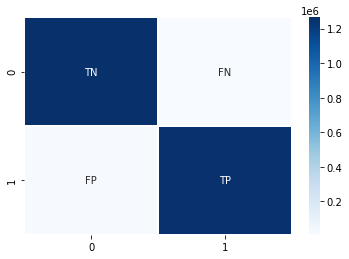

In [ ]:
plot_con_mat(model)

Test AUC Score =  0.9921672349129447
Train AUC Score =  0.9921677033124594


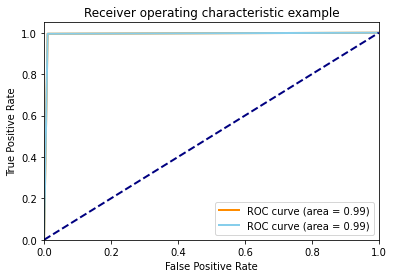

In [ ]:
plot_auc_roc(model)

**<h3>RNN</h3>**

In [16]:
# Initializing parameters
batch_size = 16
input_dim = 14
timesteps = 1

In [18]:
X_train = np.reshape(X_train, (len(X_train), 1, len(X_train[0])))
X_test = np.reshape(X_test, (len(X_test), 1, len(X_test[0])))

In [30]:
# Initiliazing the sequential model
n_hidden = 32
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(units = 1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 32)                6016      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 6,049
Trainable params: 6,049
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
# Training the model
model.fit(X_train,y_train,batch_size=128,epochs=7)

Epoch 1/7
10167038/10167038 [==============================] - 182s 18us/step - loss: 0.0685 - accuracy: 0.9756
Epoch 2/7
10167038/10167038 [==============================] - 183s 18us/step - loss: 0.0472 - accuracy: 0.9846
Epoch 3/7
10167038/10167038 [==============================] - 182s 18us/step - loss: 0.0440 - accuracy: 0.9857
Epoch 4/7
10167038/10167038 [==============================] - 186s 18us/step - loss: 0.0419 - accuracy: 0.9864
Epoch 5/7
10167038/10167038 [==============================] - 182s 18us/step - loss: 0.0405 - accuracy: 0.9868
Epoch 6/7
10167038/10167038 [==============================] - 181s 18us/step - loss: 0.0394 - accuracy: 0.9872
Epoch 7/7
10167038/10167038 [==============================] - 184s 18us/step - loss: 0.0385 - accuracy: 0.9876


In [33]:
score = model.evaluate(X_test, y_test)
print(score)

2541760/2541760 [==============================] - 63s 25us/step
[0.03167939808100696, 0.9914224743843079]



f1 score is 0.9923
[[1259049   12024]
 [   7590 1263100]]


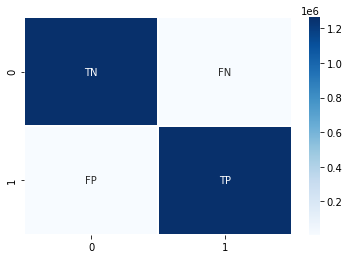

In [ ]:
plot_con_mat(model)

0.9922890463501195
0.9922635157201722


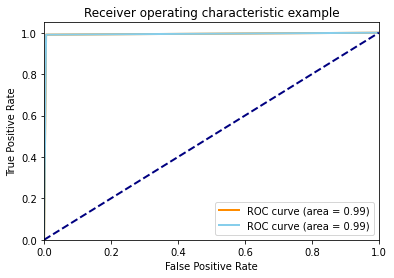

In [ ]:
plot_auc_roc(model)

**<h3>DRNN</h3>**

In [19]:
# Initiliazing the sequential model
n_hidden = 32
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden,return_sequences=True, input_shape=(timesteps, input_dim)))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(32))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(units = 1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 32)             6016      
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 64)             24832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 64)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 43,297
Trainable params: 43,297
Non-trainable params: 0
__________________________________________________

In [20]:
# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
# Training the model
model.fit(X_train,y_train,batch_size=128,epochs=7)

Epoch 1/7
10167038/10167038 [==============================] - 484s 48us/step - loss: 0.0523 - accuracy: 0.9809
Epoch 2/7
10167038/10167038 [==============================] - 488s 48us/step - loss: 0.0382 - accuracy: 0.9870
Epoch 3/7
10167038/10167038 [==============================] - 489s 48us/step - loss: 0.0339 - accuracy: 0.9887
Epoch 4/7
10167038/10167038 [==============================] - 475s 47us/step - loss: 0.0312 - accuracy: 0.9896
Epoch 5/7
10167038/10167038 [==============================] - 501s 49us/step - loss: 0.0294 - accuracy: 0.9902
Epoch 6/7
10167038/10167038 [==============================] - 486s 48us/step - loss: 0.0278 - accuracy: 0.9907
Epoch 7/7
10167038/10167038 [==============================] - 487s 48us/step - loss: 0.0265 - accuracy: 0.9912


In [28]:
score = model.evaluate(X_test, y_test)
print(score)

2541760/2541760 [==============================] - 88s 34us/step
[0.02005503416067034, 0.9934864044189453]



f1 score is 0.9935
[[1259003   11506]
 [   5050 1266201]]


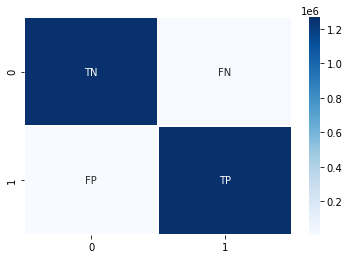

In [23]:
plot_con_mat(model,X_test)

Test AUC Score =  0.9934998599446301
Train AUC Score =  0.9936235577335973


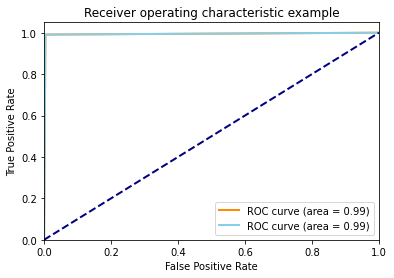

In [25]:
plot_auc_roc(model)

**<h3> CONCLUSION </h3>**

In [27]:
from prettytable import PrettyTable

In [35]:
x = PrettyTable()
x.field_names = ["Model","F1 Scoree", "accuracy (%)","loss"]
x.add_row(["ANN", 0.9921, 0.9797, 0.0540])
x.add_row(["RNN",0.9923, 0.9914, 0.0317])
x.add_row(["DRNN", 0.9935, 0.9874, 0.0201])
print('Model Comparison')
print(x)

Model Comparison
+-------+-----------+--------------+--------+
| Model | F1 Scoree | accuracy (%) |  loss  |
+-------+-----------+--------------+--------+
|  ANN  |   0.9921  |    0.9797    | 0.054  |
|  RNN  |   0.9923  |    0.9914    | 0.0317 |
|  DRNN |   0.9935  |    0.9874    | 0.0201 |
+-------+-----------+--------------+--------+


DRNN has best f1 score of 0.9935 and least loss of 0.0201.